In [10]:
%matplotlib inline

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns
import os

In [ ]:
# PREPROCESAMIENTO DE DATOS

# Leemos los datos del archivo txt
XY_bal_log_Rel = np.genfromtxt('XY_bal_log_Rel.txt', dtype='str')
# Convertimos los datos a float omitiendo la primera fila que son los nombres de las columnas
XY_bal_log_Rel_data = np.asarray(XY_bal_log_Rel[1:, :], dtype=float)

# Imprimimos la primera fila de los datos para verificar los encabezados (columnas)
print(XY_bal_log_Rel[0, :])
# Imprimimos la forma del arreglo para confirmar las dimensiones de los datos cargados (filas, columnas)
print(XY_bal_log_Rel_data.shape)

# Inicializamos un arreglo (matriz) vacío con el mismo número de columnas que los datos cargados
# para almacenar los datos filtrados
XY_bal_log_Rel_data_sigma0 = np.zeros([0, XY_bal_log_Rel_data.shape[1]])

# Se establece el valor de sigmaastro a 0 para seleccionar los datos con sigmaastro mayor a 0
sigmaastro = 0

# Recorremos los datos cargados y seleccionamos los datos cuyo valor en la columna 2 (E_peak) sea mayor o igual a sigmaastro (0)
# y los agregamos a la matriz vacía XY_bal_log_Rel_data_sigma0
for i in range(len(XY_bal_log_Rel_data)):
    if XY_bal_log_Rel_data[i, 2] >= sigmaastro:  # Las columnas son 0=beta, 1=beta_err, 2=E_peak, 3=sigma, 4=curv_sign
        XY_bal_log_Rel_data_sigma0 = np.concatenate((XY_bal_log_Rel_data_sigma0, [XY_bal_log_Rel_data[i, :]]), axis=0)

# Se actualiza la variable XY_bal_log_Rel_data con las filas filtradas 
XY_bal_log_Rel_data = XY_bal_log_Rel_data_sigma0

# Se separan las características (X) de las etiquetas (Y)
# X_bal_log_Rel_data contiene las columnas 0, 1, 2 y 3 (beta, beta_err, E_peak y sigma)
X_bal_log_Rel_data = XY_bal_log_Rel_data[:, [0, 1, 2, 3]]
# Y contiene la columna 4 (curv_sign)
Y = XY_bal_log_Rel_data[:, 4]

# Se imprime la forma de los datos para verificar que se hayan cargado correctamente
print(X_bal_log_Rel_data.shape)
print(Y.shape)
# Se imprime el valor mínimo de E_peak (columna 2) en escala logarítmica
print(10**XY_bal_log_Rel_data[:, 2].min())
# Se imprimen los valores de Y
print(Y)

/Users/martacaninoromero/DarkMatter_ML_TFG/notebooks/ann/data/raw/XY_bal_log_Rel.txt


FileNotFoundError: ./data/raw/XY_bal_log_Rel.txt not found.

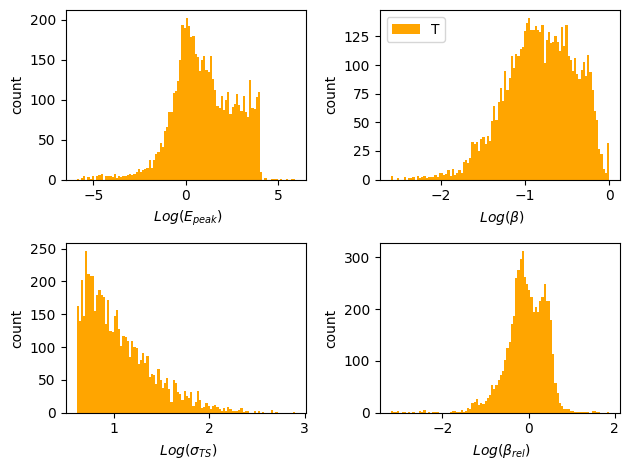

In [ ]:
# ----- GRÁFICA DE HISTOGRAMAS -----
import matplotlib.pyplot as plt

# Se crea una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(nrows=2, ncols=2)
# Se asignan los ejes a variables
ax0, ax1, ax2, ax3 = axes.flatten()

# ---- HISTOGRAMA 1 ----
# Se grafica un histograma con 100 bins y los datos de la columna 0 (E_peak)
ax0.hist(X_bal_log_Rel_data[:, [0]], 100, color='orange')
# Se configuran las etiquetas de eje x como Log(E_peak) y de eje y como count
ax0.set_xlabel(r' $Log(E_{peak})$')
ax0.set_ylabel('count')

# ---- HISTOGRAMA 2 ----
# Se grafica el histograma de la columna 1 (beta) en el eje 1
ax1.hist(X_bal_log_Rel_data[:, [1]], 100, color='orange')
# Se añade una leyenda con los nombres de las distribuciones
ax1.legend(('TOT: Astro+DM'))
# Se configuran las etiquetas de eje x como Log(beta) y de eje y como count
ax1.set_xlabel(r' $Log(\beta)$')
ax1.set_ylabel('count')

# ---- HISTOGRAMA 3 ----
# Se grafica el histograma de la columna 2 (sigma) en el eje 2
ax2.hist(X_bal_log_Rel_data[:, [2]], 100, color='orange')
# Se configuran las etiquetas de eje x como Log(sigma) y de eje y como count
ax2.set_xlabel(r' $Log(\sigma_{TS})$')
ax2.set_ylabel('count')

# ---- HISTOGRAMA 4 ----
# Se grafica el histograma de la columna 3 (beta_err) en el eje 3
ax3.hist(X_bal_log_Rel_data[:, [3]], 100, color='orange')
# Se configuran las etiquetas de eje x como Log(beta_err) y de eje y como count
ax3.set_xlabel(r' $Log(\beta_{rel})$')
ax3.set_ylabel('count')

# Ajustar el diseño de la figura para evitar solapamientos
fig.tight_layout()
plt.show()

# Guardar la figura en un archivo (comentado)
# fig.savefig("histo_tot_data_bal.pdf", bbox_inches='tight')


In [ ]:
# Se imprime el valor máximo y mínimo de E_peak en escala logarítmica
# para verificar que los datos estén en el rango esperado
print('sigma max',10**X_bal_log_Rel_data[:,2].max())
print('sigma min',10**X_bal_log_Rel_data[:,2].min())
print('log sigma max',X_bal_log_Rel_data[:,2].max())
print('log sigma min',X_bal_log_Rel_data[:,2].min())
np.log10(100)

sigma max 792.6913000000003
sigma min 4.056
log sigma max 2.89910409172093
log sigma min 0.6080979463252796


np.float64(2.0)

In [ ]:
# Inicializar la variable NDM_sample en 0 para contar la cantidad de 1s en Y
NDM_sample = 0

# Recorrer todos los elementos de Y
for i in range(0, len(Y)):
        # Si el valor es 1, incrementar el contador NDM_sample
        if Y[i] == 1:
                NDM_sample = NDM_sample + 1

# Imprimir la cantidad de 1s en Y
print(NDM_sample)

# Inicializar la variable Nastro_sample en 0 para contar la cantidad de 0s en Y
Nastro_sample = 0

# Recorrer todos los elementos de Y
for i in range(0, len(Y)):
        # Si el valor es 0, incrementar el contador Nastro_sample
        if Y[i] == 0:
                Nastro_sample = Nastro_sample + 1

# Imprimir la cantidad de 0s en Y
print(Nastro_sample)

2831
2831


In [ ]:
# Asignar los datos de características filtrados a la variable X_log
X_log = X_bal_log_Rel_data

# Normalizador para estandarizar los datos (comentado)
# normalizer = sklearn.preprocessing.StandardScaler()
# Ajustar el normalizador a los datos
# normalizer.fit(X_log)
# Imprimir la media utilizada para la estandarización
# print('StandardSaler mean', normalizer.mean_)
# Transformar los datos utilizando el normalizador
# X_log = normalizer.transform(X_log)

# Aplicar la transformación logarítmica base 10 a los datos (comentado)
# X_log = np.log10(X_log)

# Imprimir la forma del arreglo X_log para verificar sus dimensiones
print(X_log.shape)
# Imprimir los valores de las primeras filas y la primera columna de X_log
print(X_log[1:5, 0])
# Imprimir los valores de las primeras filas y la segunda columna de X_log
print(X_log[1:5, 1])

# Imprimir la forma del arreglo Y para verificar sus dimensiones
print(Y.shape)

(5662, 4)
[0.70814035 0.22474019 0.25731851 0.32611046]
[-1.73752546e-04 -5.81201709e-01 -5.61932550e-01 -1.10017950e+00]
(5662,)


In [ ]:
# Leer los datos del archivo 'unids_3F_beta_err_names.txt' como cadenas de texto
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt', dtype='str') 

# Convertir los datos leídos (excepto la primera fila) a un arreglo de tipo float
unids_3F_data = np.asarray(unids_3F[1::, :], dtype=float)

# Imprimir la primera fila del archivo, que contiene los nombres de las columnas
print(unids_3F[0, :])

# Aplicar la función logarítmica base 10 a las columnas 0, 1, 2 y 3 de los datos convertidos
unids_log = np.log10(unids_3F_data[:, [0, 1, 2, 3]])

# Imprimir la forma del arreglo resultante
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 4)


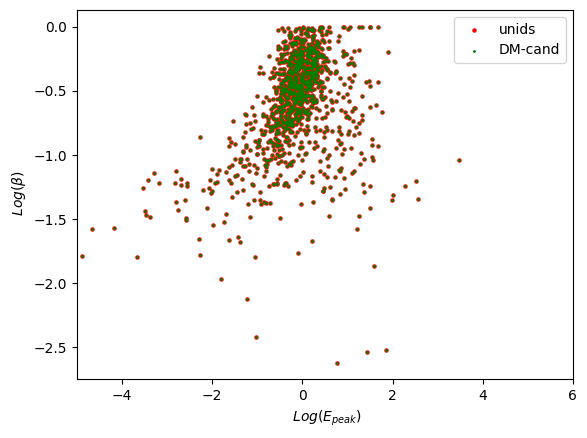

In [ ]:
import matplotlib.pyplot as plt

# Crear una nueva figura
f = plt.figure()

# Graficar los datos de unids_log en un diagrama de dispersión (scatter plot) con color rojo y tamaño de puntos 5
plt.scatter(unids_log[:,0], unids_log[:,1], color='red', label='unids', s=5)

# Graficar los datos de unids_3F_data en un diagrama de dispersión con color verde y tamaño de puntos 1
plt.scatter(np.log10(unids_3F_data[:,0]), np.log10(unids_3F_data[:,1]), color='green', label='DM-cand', s=1)

# Configurar la etiqueta del eje y
plt.ylabel(r' $Log(\beta)$')

# Configurar la etiqueta del eje x
plt.xlabel(r' $Log(E_{peak})$')

# Establecer los límites del eje x
plt.xlim(-5, 6)

# Añadir una leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

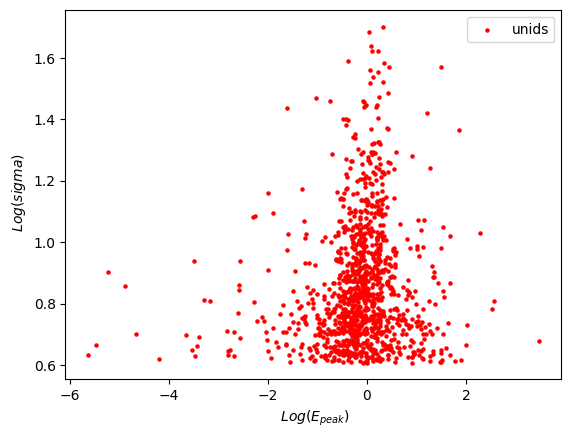

In [ ]:
import matplotlib.pyplot as plt

# Crear una nueva figura
f = plt.figure()

# Graficar los datos de unids_log en un diagrama de dispersión (scatter plot) con color rojo y tamaño de puntos 5
plt.scatter(unids_log[:,0], unids_log[:,2], color='red', label='unids', s=5)

# Configurar la etiqueta del eje y
plt.ylabel(r' $Log(sigma)$')

# Configurar la etiqueta del eje x
plt.xlabel(r' $Log(E_{peak})$')

# Añadir una leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

# ANN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Definir el rango de neuronas para cada capa oculta
N_cells = np.arange(1, 110, 10)

# Crear diferentes configuraciones para capas ocultas
# Configuración con una sola capa oculta
hidden_layers_1 = [(n_cells,) for n_cells in N_cells]
# Configuración con dos capas ocultas, ambas con el mismo número de neuronas
hidden_layers_2 = [(n_cells, n_cells) for n_cells in N_cells]

# Definir la cuadrícula de parámetros para GridSearchCV
params = [{'model__hidden_layer_sizes': hidden_layers_1},
          {'model__hidden_layer_sizes': hidden_layers_2}]

# Definir los pasos para el pipeline
steps = [('scaler', StandardScaler()),  # Paso para escalar las características
         ('model', MLPClassifier(solver='adam', alpha=0.0, batch_size=120, 
                                 learning_rate_init=0.015, max_iter=1000, 
                                 random_state=None, activation='relu'))]

# Crear el pipeline
pipe = Pipeline(steps)

In [ ]:
# VALIDACION CRUZADA
# estratificada repetida para evaluar el modelo con diferentes divisiones de los datos
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

# Normalizador para estandarizar los datos
normalizer = sklearn.preprocessing.StandardScaler()

# Configuración de la validación cruzada estratificada repetida
# Definición de los parámetros para la validación cruzada estratificada repetida
N_splits = 5  # Número de divisiones para la validación cruzada
N_Repeats = 1  # Número de repeticiones de la validación cruzada

# Listas para almacenar métricas de evaluación
OA = []  # Precisión global
TN = []  # Verdaderos negativos
TP = []  # Verdaderos positivos

# Archivo para guardar los resultados de las predicciones de las probabilidades
unids_DM_std_proba_check_repeated_kfold_rskf_4F_21 = open("unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.txt", "w")
unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.write('Numb unids_DM_proba_check_repeated_kfold \n')

# Configuración de la validación cruzada estratificada repetida
rskf = RepeatedStratifiedKFold(n_splits=N_splits, n_repeats=N_Repeats)
rskf.get_n_splits(X_log, Y)
print('rskf', rskf)

# ENTRENAMIENTO DE LA RED NEURONAL
# Ahora sse entrena el Perceptrón Multicapa (MLP - Multi-Layer Perceptron) utilizando las configuraciones anteriores

# Definición del clasificador MLP (Perceptrón Multicapa)
ANN = MLPClassifier(solver='adam', alpha=0.0, batch_size=120,
                    learning_rate_init=0.015, max_iter=1000,
                    random_state=None, activation='relu')

# Bucle para realizar la validación cruzada estratificada repetida
for train_index, test_index in rskf.split(X_log, Y):
        print('train_index', train_index.shape, "test_index", test_index.shape)
        
        # División de los datos en conjuntos de entrenamiento y prueba
        X_train_split, X_test_split = X_log[train_index], X_log[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]
        
        # Estandarización de los datos
        normalizer.fit(X_train_split)
        X_train_split_std = normalizer.transform(X_train_split)
        X_test_split_std = normalizer.transform(X_test_split)
        
        # Entrenamiento del clasificador MLP
        ANN_fit = ANN.fit(X_train_split_std, Y_train_split)
        
        # Predicción de las etiquetas y probabilidades en el conjunto de prueba
        Y_test_split_01_std_check = ANN_fit.predict(X_test_split_std)
        Y_test_split_proba_std_check = ANN_fit.predict_proba(X_test_split_std)
        
        # Cálculo de la precisión y la matriz de confusión
        OA.extend([accuracy_score(Y_test_split, Y_test_split_01_std_check)])
        conf_matrix = sklearn.metrics.confusion_matrix(Y_test_split, Y_test_split_01_std_check, normalize='true')
        TN.extend([conf_matrix[0,0]])
        TP.extend([conf_matrix[1,1]])
        
        # Estandarización de los datos no identificados y predicción de probabilidades
        unids_std_check = normalizer.transform(unids_log)
        unIDs_std_proba_check_repeated_kfold = ANN_fit.predict_proba(unids_std_check)
        
        # Guardar los resultados de las predicciones en el archivo
        for i in range(len(unids_std_check)):
                unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.write('{} {} \n'.format(i, unIDs_std_proba_check_repeated_kfold[i,1]))

# Cerrar el archivo de resultados
unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.close()

# Convertir las listas de resultados a arrays de numpy
OA = np.array(OA)
TN = np.array(TN)
TP = np.array(TP)

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print('X_train_split.shape', X_train_split.shape)
print('X_test_split.shape', X_test_split.shape)


rskf RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
X_train_split.shape (4530, 4)
X_test_split.shape (1132, 4)


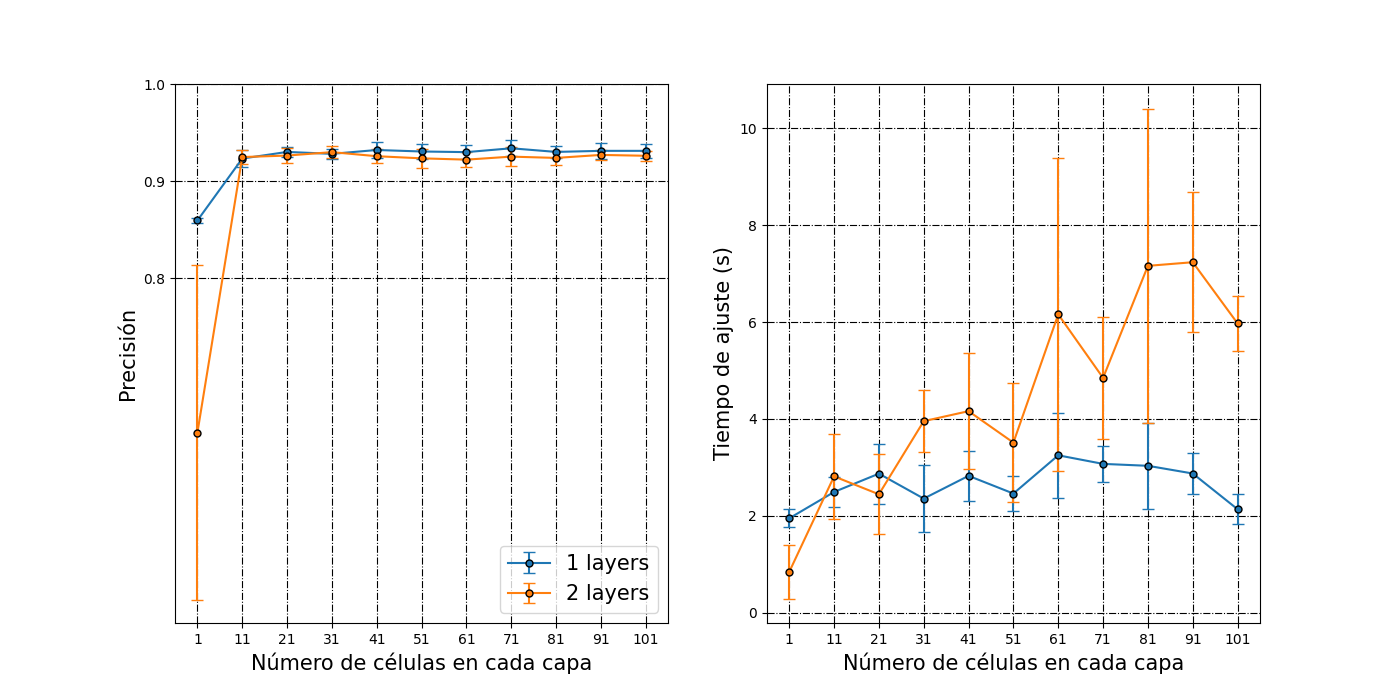

In [ ]:
%matplotlib widget
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold

# Crear una figura con 2 subgráficos (1 fila, 2 columnas) y compartir el eje x
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharex=True)

# Inicializar la variable para almacenar el mejor puntaje
best_score = 0

# Iterar sobre los parámetros definidos en 'params'
for i, param in enumerate(params):
    # Realizar una búsqueda en cuadrícula (GridSearchCV) con validación cruzada estratificada (StratifiedKFold)
    search = GridSearchCV(pipe, param, scoring='accuracy', n_jobs=-1, 
                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)).fit(X_train_split, Y_train_split)
    
    # Convertir los resultados de la búsqueda en un DataFrame de pandas
    grid_results = pd.DataFrame(search.cv_results_)
    
    # HACER EL GRÁFICO
    # Graficar la precisión media de la validación cruzada con barras de error
    axs[0].errorbar(N_cells, grid_results['mean_test_score'], yerr=grid_results['std_test_score'], 
                  fmt='-o', ms=5, mec='k', capsize=4, label= str(i+1)+' layers')
    axs[0].set_xlabel('Número de células en cada capa', fontsize=15)
    axs[0].set_ylabel('Precisión', fontsize=15)
    axs[0].grid(linestyle='-.', color='k')
    
    # Graficar el tiempo medio de ajuste con barras de error
    axs[1].errorbar(N_cells, grid_results['mean_fit_time'], yerr=grid_results['std_fit_time'],
                   fmt='-o', ms=5, mec='k', capsize=4)
    
    # Configurar los ticks del eje x y y
    axs[0].set_xticks(np.arange(1, 110, step=10))
    axs[0].set_yticks(np.arange(0.8, 1.01, step=0.1))
    axs[1].set_xlabel('Número de células en cada capa', fontsize=15)
    axs[1].set_ylabel('Tiempo de ajuste (s)', fontsize=15)
    axs[1].grid(linestyle='-.', color='k')
    axs[0].legend(fontsize=15)
    
    # Imprimir los resultados de la búsqueda (opcional)
    # print(search.cv_results_)

In [ ]:
import math 

# Definición de los límites del espacio de características
x_min, x_max = -6.5, 6.5 # Log[Epeak]
y_min, y_max = -7.5, 0.5 # Log[Beta] (incluyendo valores truncados de la muestra, es decir, bmin-bmin_err>0.0)
z_min, z_max = 0.0, 2.89 # Log[sigma_det] (incluyendo unids_min y sigma_det max de la muestra ORIGINAL= TRUNCADA)
# k_min, k_max = -7.5, 0.5
k_min, k_max = X_log[:, 3].min(), X_log[:, 3].max() # Log[beta_err]

# Imprimir los límites definidos
print(x_min, x_max, y_min, y_max, z_min, z_max, k_min, k_max)

# Definición del tamaño del paso en la malla
hx = 0.1
hy = 0.1
hz = 0.1
hk = 0.1

# Crear una malla de puntos en el espacio de características
xx, yy, zz, kk = np.meshgrid(np.arange(x_min, x_max, hx), 
                             np.arange(y_min, y_max, hy), 
                             np.arange(z_min, z_max, hz), 
                             np.arange(k_min, k_max, hk))

# Predecir las probabilidades usando el clasificador entrenado para cada punto en la malla
Z_classifier_sample = ANN_fit.predict_proba(np.c_[xx.ravel(), yy.ravel(), zz.ravel(), kk.ravel()])

# Imprimir la forma de las predicciones y algunas de las predicciones
print(Z_classifier_sample.shape)
print(Z_classifier_sample[0:5])

# Imprimir la forma de las mallas creadas
print(xx.shape)
print(yy.shape)

# Imprimir el tamaño de los ejes x e y
print('xsize', np.arange(x_min, x_max, hx).shape)
print('ysize', np.arange(y_min, y_max, hy).shape)
print(xx.shape)

-6.5 6.5 -7.5 0.5 0.0 2.89 -3.1986570869544226 1.8669662999160774
(15381600, 2)
[[1.00000000e+000 4.04550048e-260]
 [1.00000000e+000 8.31743381e-261]
 [1.00000000e+000 2.24132238e-261]
 [1.00000000e+000 6.03975473e-262]
 [1.00000000e+000 1.62754977e-262]]
(80, 130, 29, 51)
(80, 130, 29, 51)
xsize (130,)
ysize (80,)
(80, 130, 29, 51)


In [ ]:
# Convertir las etiquetas de prueba a un arreglo de tipo string
Y_test_color = np.asarray(Y_test_split[:], dtype='str')

# Imprimir la longitud del arreglo de etiquetas de prueba
print(len(Y_test_split))

# Imprimir la forma del arreglo de colores de etiquetas de prueba
print(Y_test_color.shape)

# Recorrer todas las etiquetas de prueba
for i in range(0, len(Y_test_split)):
    # Si la etiqueta es 1, asignar el color negro ('k')
    if Y_test_split[i] == 1:
        Y_test_color[i] = 'k'
    # Si la etiqueta es 0, asignar el color blanco ('w')
    elif Y_test_split[i] == 0:
        Y_test_color[i] = 'w'

# Imprimir el arreglo de colores de etiquetas de prueba
print(Y_test_color)

1132
(1132,)
['w' 'w' 'w' ... 'k' 'k' 'k']


(15381600, 2)


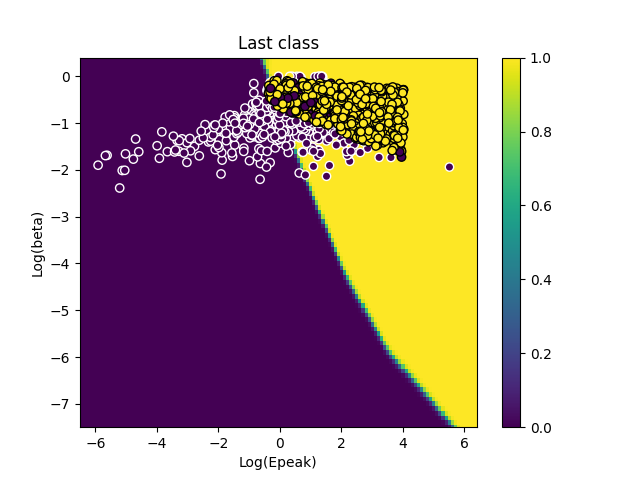

In [ ]:
# Colocar el resultado en un gráfico de colores
#Z_liblin = Z_liblin.reshape((xx.shape, yy.shape))
Z_classifier_sample_1 = Z_classifier_sample[:,1].reshape(yy.shape)
print(Z_classifier_sample.shape)

# Crear una nueva figura para el gráfico
f = plt.figure()

# Graficar la malla de puntos con los valores de Z_classifier_sample_1
plt.pcolormesh(xx[:,:,0,0], yy[:,:,0,0], Z_classifier_sample_1[:,:,0,0])

# Graficar también los puntos de prueba
test = plt.scatter(X_test_split[:, 0], X_test_split[:, 1], c=Y_test_split_01_std_check[:], edgecolors=Y_test_color[:])

# Configurar el título y las etiquetas de los ejes
plt.title('Last class')
plt.ylabel('Log(beta)')
plt.xlabel('Log(Epeak)')

# Establecer los límites de los ejes x e y
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Añadir una barra de colores para indicar la escala
plt.colorbar()
plt.clim(0.0, 1.0)

# Guardar la figura en un archivo (comentado)
# f.savefig("NN_proba_4F_bal.pdf", bbox_inches='tight')
# f.savefig("plot/test_Fit11_prob_class_E_beta.jpg", format='jpg',bbox_inches='tight', dpi=100, quality=100)


(15381600, 2)


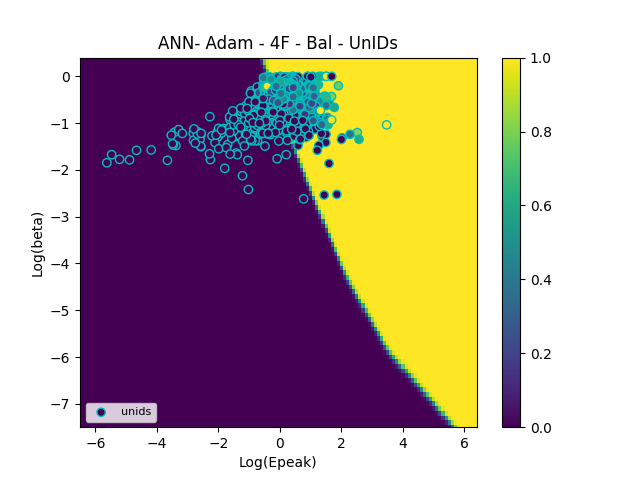

In [ ]:
# Colocar el resultado en un gráfico de colores
# Z_liblin = Z_liblin.reshape((xx.shape, yy.shape))
# Reshape de Z_classifier_sample para que coincida con la forma de yy
Z_classifier_sample_1 = Z_classifier_sample[:,1].reshape(yy.shape)
print(Z_classifier_sample.shape)

# Crear una figura para el gráfico
f = plt.figure()

# Graficar la malla de puntos con los valores de Z_classifier_sample_1
plt.pcolormesh(xx[:,:,0,0], yy[:,:,0,0], Z_classifier_sample_1[:,:,0,0])
# Añadir una barra de colores para indicar la escala
plt.colorbar()
# Establecer los límites de la barra de colores
plt.clim(0.0, 1.0)

# Graficar también los puntos no identificados (unids)
unids = plt.scatter(unids_log[:, 0], unids_log[:, 1], c=unIDs_std_proba_check_repeated_kfold[:,1], edgecolors='c')

# Configurar el título y las etiquetas de los ejes
plt.title('ANN- Adam - 4F - Bal - UnIDs')
plt.ylabel('Log(beta)')
plt.xlabel('Log(Epeak)')
# Establecer los límites de los ejes x e y
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Añadir una leyenda al gráfico
plt.legend((unids,),
          ('unids',),
          scatterpoints=1,
           loc='lower left',
           ncol=3,
          fontsize=8)

# Mostrar el gráfico
plt.show()

# Guardar la figura en un archivo (comentado)
# f.savefig("NN_4F_BAL_unIDs.pdf", bbox_inches='tight')
# f.savefig("plot/test_Fit11_prob_class_E_beta.jpg", format='jpg',bbox_inches='tight', dpi=100, quality=100)


In [ ]:
# Imprimir la forma del arreglo OA (Overall Accuracy)
print(OA.shape)

# Imprimir la media y la desviación estándar de la precisión general (Overall Accuracy)
print('OA mean', OA.mean(), 'OA std', OA.std(ddof=1))

# Imprimir la media y la desviación estándar de los verdaderos negativos (True Negatives)
print('TN mean', TN.mean(), 'TN std', TN.std(ddof=1))

# Imprimir la media y la desviación estándar de los verdaderos positivos (True Positives)
print('TP mean', TP.mean(), 'TP std', TP.std(ddof=1))

# Imprimir la forma del arreglo de probabilidades de los datos no identificados (unIDs)
print(unIDs_std_proba_check_repeated_kfold.shape)

(5,)
OA mean 0.9339445607053415 OA std 0.006692746476438565
TN mean 0.9508946099052105 TN std 0.023262302736554663
TP mean 0.9169866821221356 TP std 0.014103099116397197
(1125, 2)


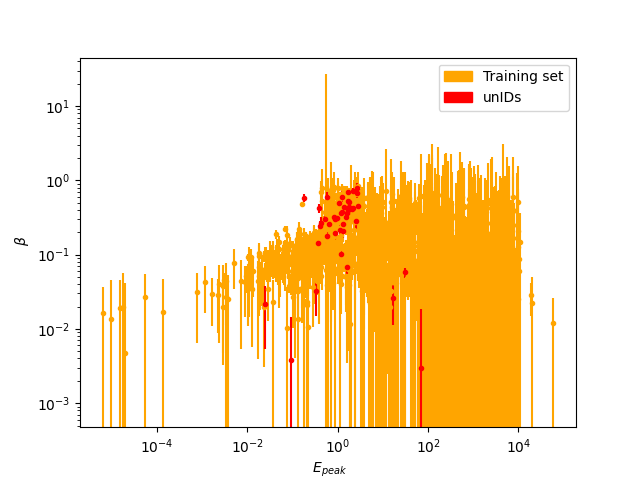

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Crear una nueva figura para el gráfico
f = plt.figure()

# Graficar los datos de entrenamiento con errores
for j in range(0, len(X_train_split_std)):
        # Filtrar los datos donde E_peak (columna 2) es mayor o igual a 20
        if 10**X_train_split[j, 2] >= 20:
                # Graficar los datos con barras de error
                plt.errorbar(10**X_train_split[j, 0], 10**X_train_split[j, 1], 
                                         yerr=10**X_train_split[j, 3] * 10**X_train_split[j, 1], 
                                         fmt=".", color='orange', label='X_train_split')

# Graficar los datos no identificados (unIDs) con errores
for i in range(0, len(unids_log)):
        # Filtrar los datos donde E_peak (columna 2) es mayor o igual a 20
        if 10**unids_log[i, 2] >= 20:
                # Graficar los datos con barras de error
                plt.errorbar(10**unids_log[i, 0], 10**unids_log[i, 1], 
                                         yerr=10**unids_log[i, 3] * 10**unids_log[i, 1], 
                                         fmt=".", color='red', label='unIDs')

# Configurar las etiquetas de los ejes
plt.ylabel(r' $\beta$')
plt.xlabel(r' $E_{peak}$')

# Configurar la escala logarítmica para ambos ejes
plt.yscale('log', base=10)
plt.xscale('log', base=10)

# Crear leyendas para los conjuntos de datos
orange_patch = mpatches.Patch(color='orange', label='Training set')
red_patch = mpatches.Patch(color='red', label='unIDs')
plt.legend(handles=[orange_patch, red_patch])

# Mostrar el gráfico
plt.show()

# Guardar la figura en un archivo (comentado)
# fig.savefig("Trainig_unIDs_errors_sigma20.pdf", bbox_inches='tight')


In [ ]:
from matplotlib.patches import Patch

# Definimos los mapas de colores para los datos y para la validación cruzada
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Crear un gráfico de ejemplo para los índices de un objeto de validación cruzada."""

    # Generamos las visualizaciones de entrenamiento/prueba para cada división de la validación cruzada
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Rellenamos los índices con los grupos de entrenamiento/prueba
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1  # Índices de prueba
        indices[tr] = 0  # Índices de entrenamiento

        # Visualizamos los resultados
        ax.scatter(
            range(len(indices)),  # Índices de muestra
            [ii + 0.5] * len(indices),  # Iteración de CV
            c=indices,  # Colores según los índices
            marker="_",  # Marcador de subrayado
            lw=lw,  # Ancho de línea
            cmap=cmap_cv,  # Mapa de colores para CV
            vmin=-0.2,  # Valor mínimo del mapa de colores
            vmax=1.2,  # Valor máximo del mapa de colores
        )

    # Graficamos las clases de datos y los grupos al final
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formateo del gráfico
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,  # Etiquetas del eje y
        yticklabels=yticklabels,  # Etiquetas de las iteraciones de CV, clases y grupos
        xlabel="Índice de muestra",  # Etiqueta del eje x
        ylabel="Iteración de CV",  # Etiqueta del eje y
        ylim=[n_splits + 2.2, -0.5],  # Límites del eje y
        xlim=[0, len(X_log)],  # Límites del eje x
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)  # Título del gráfico
    return ax

/Users/martacaninoromero/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by RepeatedStratifiedKFold
  warnings.warn(
/Users/martacaninoromero/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


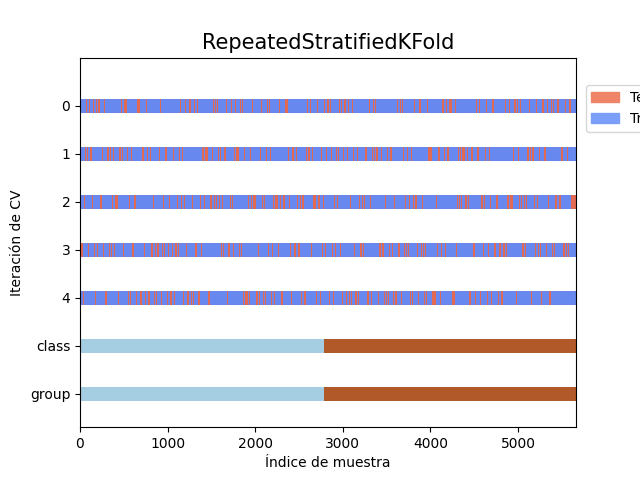

In [ ]:
# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots()

# Definir el objeto de validación cruzada repetida estratificada
cv = rskf

# Llamar a la función plot_cv_indices para graficar los índices de validación cruzada
# cv: objeto de validación cruzada
# X_log: características
# Y: etiquetas
# Y: grupos (en este caso, las mismas etiquetas)
# ax: eje donde se graficará
# N_splits*N_Repeats: número de divisiones de la validación cruzada
plot_cv_indices(cv, X_log, Y, Y, ax, N_splits * N_Repeats)

# Acceder a los ejes del gráfico
ax.axes

# Añadir una leyenda al gráfico
ax.legend(
    [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.2))],  # Definir los colores de los parches
    ["Testing set", "Training set"],  # Etiquetas de la leyenda
    loc=(1.02, 0.8),  # Ubicación de la leyenda
)

# Guardar la figura en un archivo (comentado)
# fig.savefig("Reapeated5_Kfold5_split.pdf", bbox_inches='tight')

# unIDs classification with errors

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [ ]:
# Leer los datos del archivo 'unids_3F_beta_err_names.txt' como cadenas de texto
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt', dtype='str') 

# Convertir los datos leídos (excepto la primera fila) a un arreglo de tipo float
unids_3F_data = np.asarray(unids_3F[1:, :], dtype=float)

# Imprimir la primera fila del archivo, que contiene los nombres de las columnas
print(unids_3F[0, :])

# Aplicar la función logarítmica base 10 a las columnas 0, 1, 2 y 3 de los datos convertidos
unids_log = np.log10(unids_3F_data[:, [0, 1, 2, 3]])

# Imprimir la forma del arreglo resultante
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 4)


In [ ]:
# Leer los datos del archivo 'unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.txt' como cadenas de texto
unids_DM_std_proba_repeated_kfold = np.genfromtxt('unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.txt', dtype='str') 

# Convertir los datos leídos (excepto la primera fila) a un arreglo de tipo float
unids_DM_std_proba_data_repeated_kfold = np.asarray(unids_DM_std_proba_repeated_kfold[1:], dtype=float)

# Imprimir la primera fila de los datos convertidos
print(unids_DM_std_proba_data_repeated_kfold[0, :])
# Imprimir la segunda fila de los datos convertidos
print(unids_DM_std_proba_data_repeated_kfold[1, :])

# Imprimir la forma del arreglo resultante
print('unids_DM_std_proba_data_repeated_kfold.shape', unids_DM_std_proba_data_repeated_kfold.shape)

# Imprimir las primeras tres columnas de la primera fila de los datos convertidos
print(unids_DM_std_proba_data_repeated_kfold[0, 0:3])
# Imprimir las primeras tres columnas de la segunda fila de los datos convertidos
print(unids_DM_std_proba_data_repeated_kfold[1, 0:3])
# Imprimir las primeras tres columnas de la tercera fila de los datos convertidos
print(unids_DM_std_proba_data_repeated_kfold[2, 0:3])

[0.00000000e+00 3.28447898e-09]
[1.         0.25704765]
unids_DM_std_proba_data_repeated_kfold.shape (5625, 2)
[0.00000000e+00 3.28447898e-09]
[1.         0.25704765]
[2.        0.5156698]


In [ ]:
# Definiendo un arreglo donde cada columna es la probabilidad de ser DM para cada unID en cada división

import itertools 

# Obtener el número de unIDs (filas) del arreglo unids_log
N_unids = unids_log.shape[0]
print('N_unids', N_unids)

# Calcular el número de muestras como el producto del número de divisiones y repeticiones
N_sample = N_splits * N_Repeats
print('N_sample', N_sample)

# Imprimir la forma del arreglo de probabilidades de datos repetidos
print(unids_DM_std_proba_data_repeated_kfold.shape)

# Obtener los números de unIDs de la primera columna del arreglo de probabilidades de datos repetidos
unids_number = unids_DM_std_proba_data_repeated_kfold[0:N_unids, 0]

print('unids number', unids_number)
print('unids number shape', unids_number.shape)

# Inicializar un arreglo de ceros con el número de unIDs y el número de muestras más una columna para los números de unIDs
unids_DM_std_proba_N_sample_repeated_kfold = np.zeros((N_unids, (N_sample + 1)))

# Asignar los números de unIDs a la primera columna del nuevo arreglo
unids_DM_std_proba_N_sample_repeated_kfold[:, 0] = unids_number[:].astype(int)

# Asignar las probabilidades de ser DM a las siguientes columnas del nuevo arreglo
unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample + 1)] = np.reshape(
      unids_DM_std_proba_data_repeated_kfold[:, 1], (N_unids, (N_sample))
)

# Imprimir la forma del nuevo arreglo y su contenido
print('unids_DM_std_proba_N_sample_repeated_kfold.shape', 
        unids_DM_std_proba_N_sample_repeated_kfold.shape)
print(unids_DM_std_proba_N_sample_repeated_kfold)

# Convertir el arreglo a un array de numpy (comentado)
# unids_DM_std_proba_N_sample_repeated_kfold = np.array(unids_DM_std_proba_N_sample_repeated_kfold)

# Convertir la primera columna de probabilidades a flotante (comentado)
# unids_int_prob = float((unids_DM_std_proba_N_sample_repeated_kfold[:, 1].T))
# print(unids_int_prob)

N_unids 1125
N_sample 5
(5625, 2)
unids number [0.000e+00 1.000e+00 2.000e+00 ... 1.122e+03 1.123e+03 1.124e+03]
unids number shape (1125,)
unids_DM_std_proba_N_sample_repeated_kfold.shape (1125, 6)
[[0.00000000e+00 3.28447898e-09 2.57047649e-01 5.15669795e-01
  1.27106619e-01 3.61203378e-01]
 [1.00000000e+00 1.42682033e-14 1.22461620e-16 5.10620504e-11
  1.99495380e-01 1.48378705e-03]
 [2.00000000e+00 9.53054908e-29 2.13546009e-38 1.26789721e-01
  6.02477390e-64 3.17154914e-01]
 ...
 [1.12200000e+03 3.70818395e-01 1.48843709e-24 4.06623447e-16
  9.46176224e-15 4.65653908e-01]
 [1.12300000e+03 1.82625975e-01 2.57088344e-72 1.93099298e-01
  2.53227091e-01 2.03095973e-08]
 [1.12400000e+03 8.22125700e-58 3.56243414e-01 8.69802238e-13
  2.62796619e-44 3.36940457e-01]]


In [ ]:
# Calcular la media de las probabilidades de ser DM para cada unID a lo largo de todas las muestras
unids_mean = unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample+1)].mean(axis=1)

# Calcular la desviación estándar de las probabilidades de ser DM para cada unID a lo largo de todas las muestras
unids_std = unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample+1)].std(axis=1, ddof=1)

# Imprimir las medias y desviaciones estándar calculadas
print('unids_mean', unids_mean, 'unids std', unids_std)

# Imprimir la forma del arreglo de medias
print(unids_mean.shape)

# Definir un valor de corte para la probabilidad
p_cut = 0.90

unids_mean [0.25220549 0.04019583 0.08878893 ... 0.16729446 0.12579048 0.13863677] unids std [0.2003589  0.08905347 0.13896538 ... 0.23151818 0.11794843 0.18995885]
(1125,)


Text(0, 0.5, 'count')

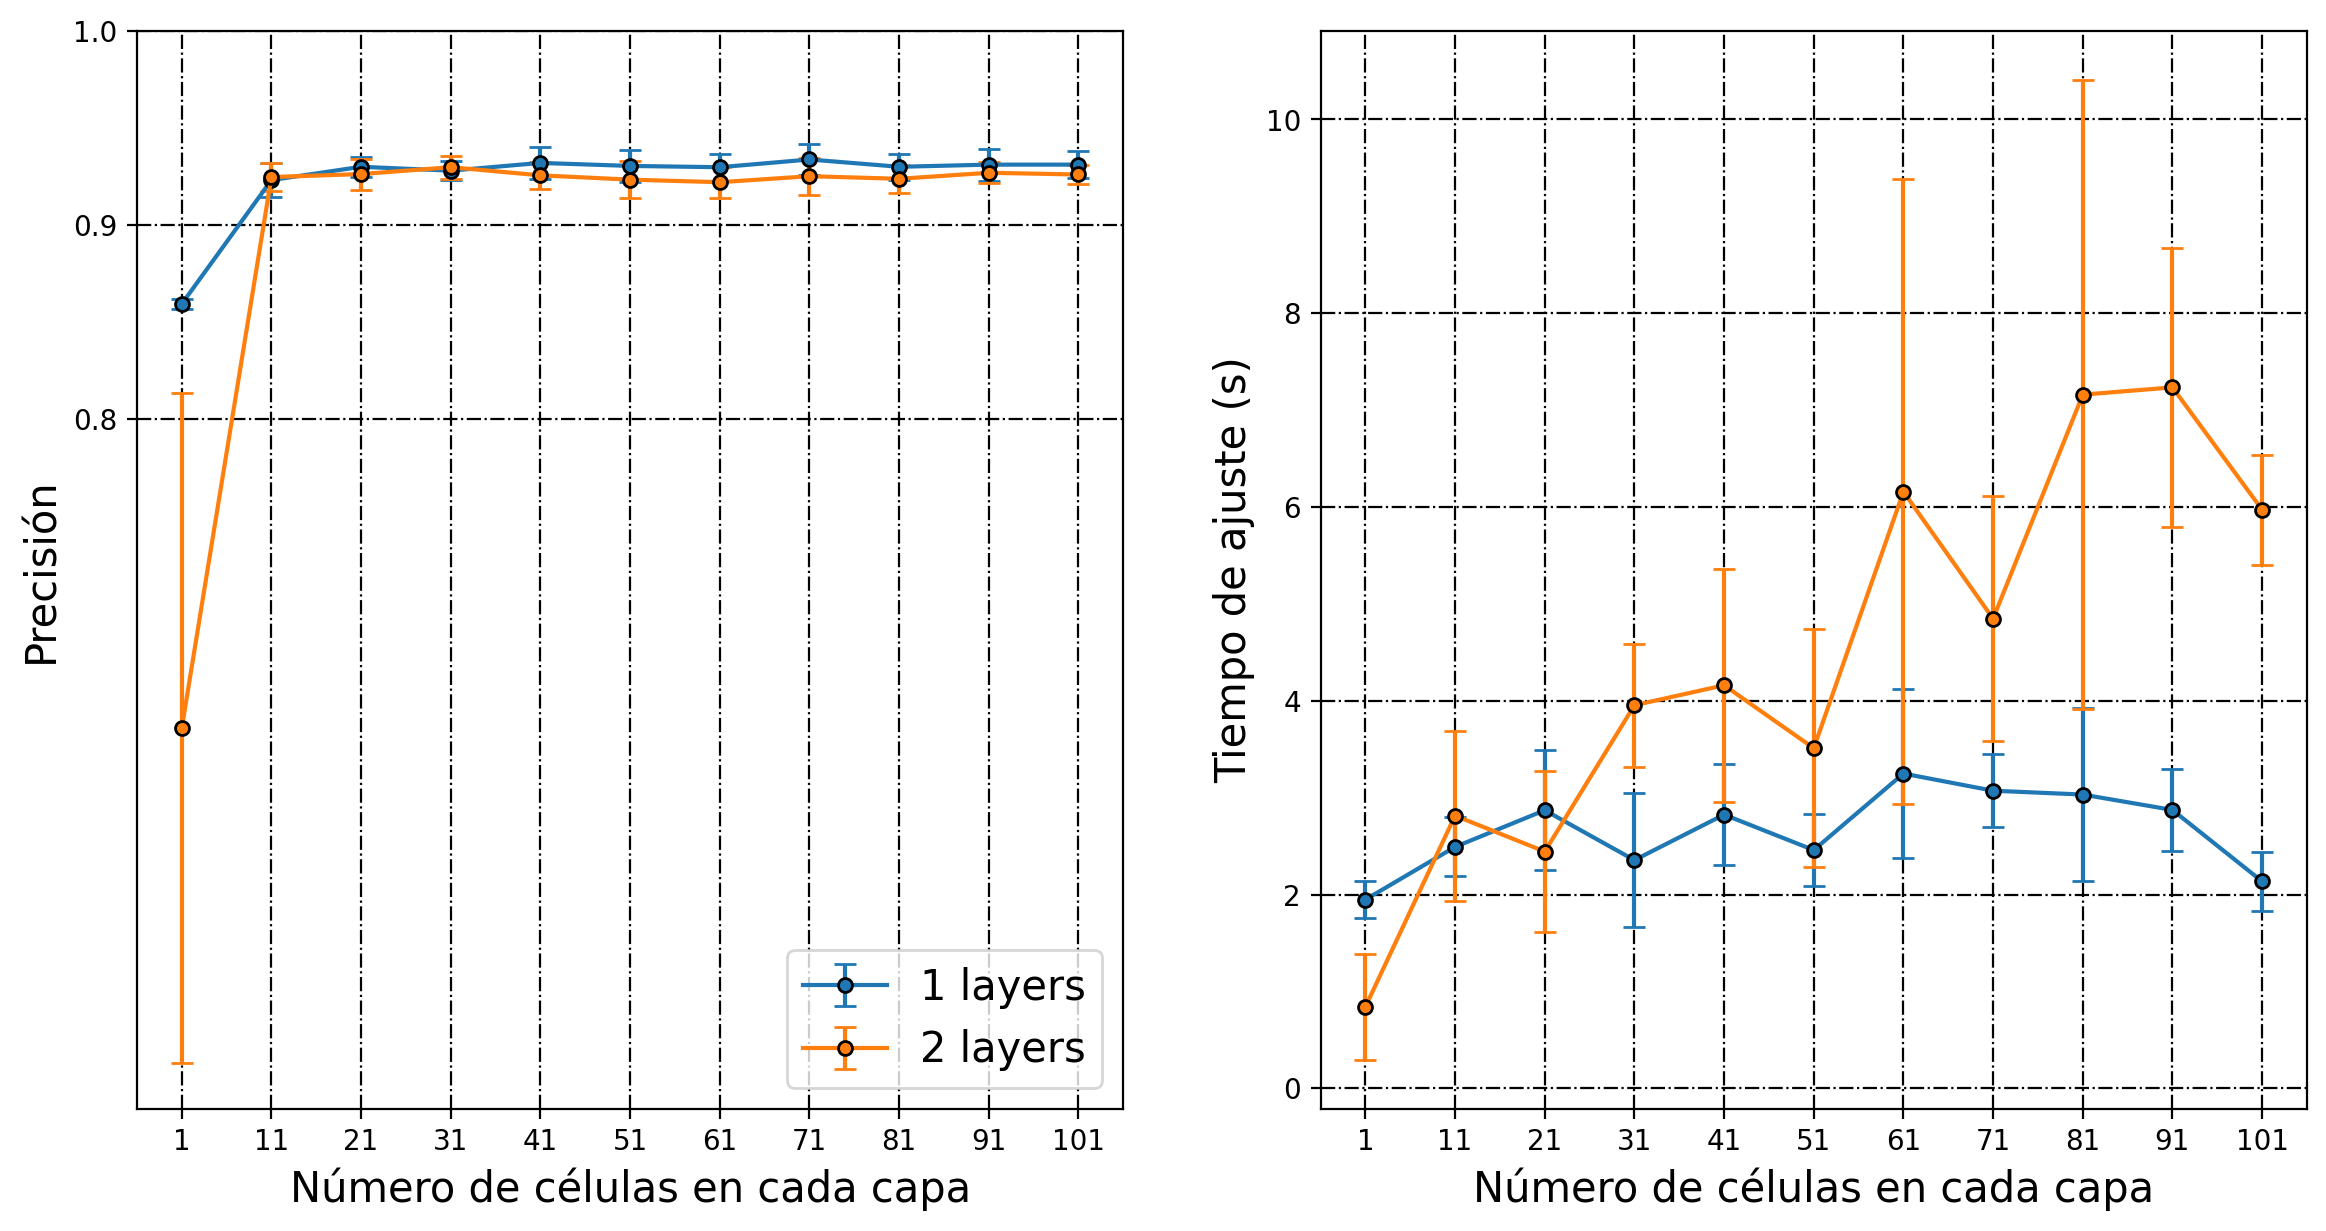

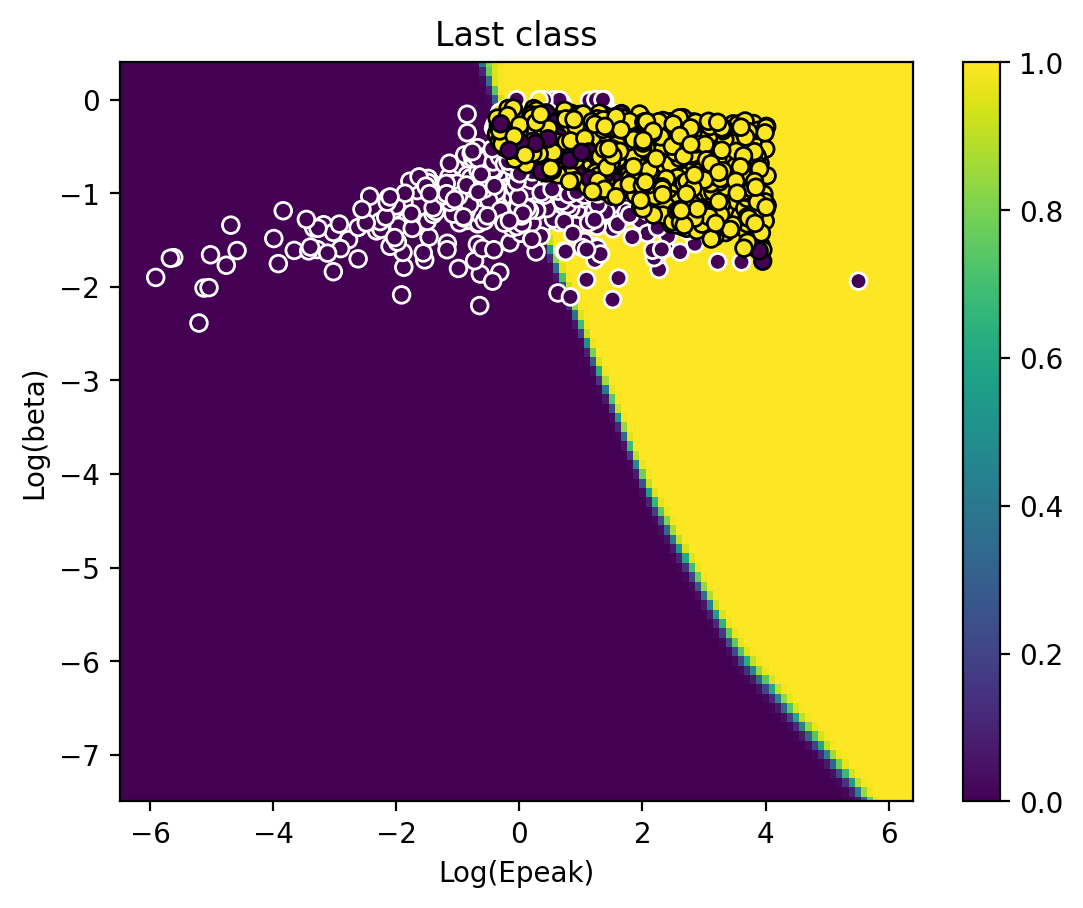

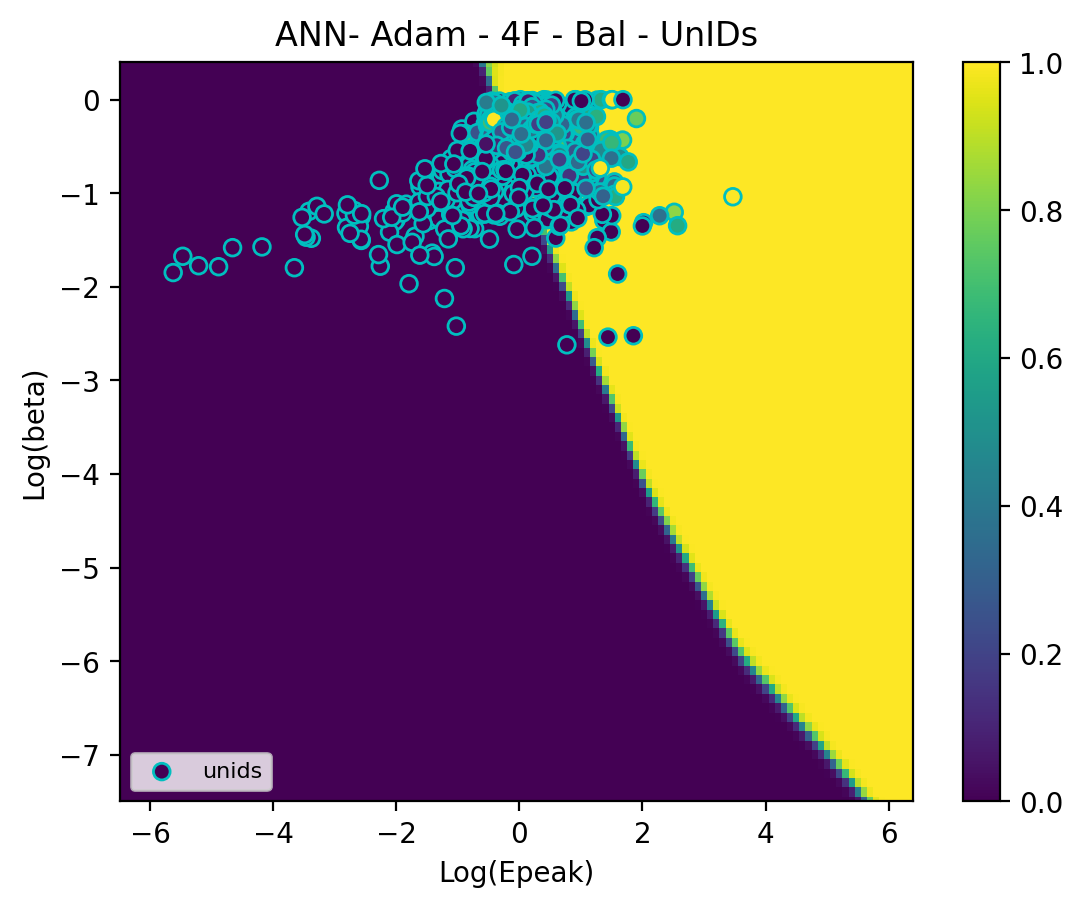

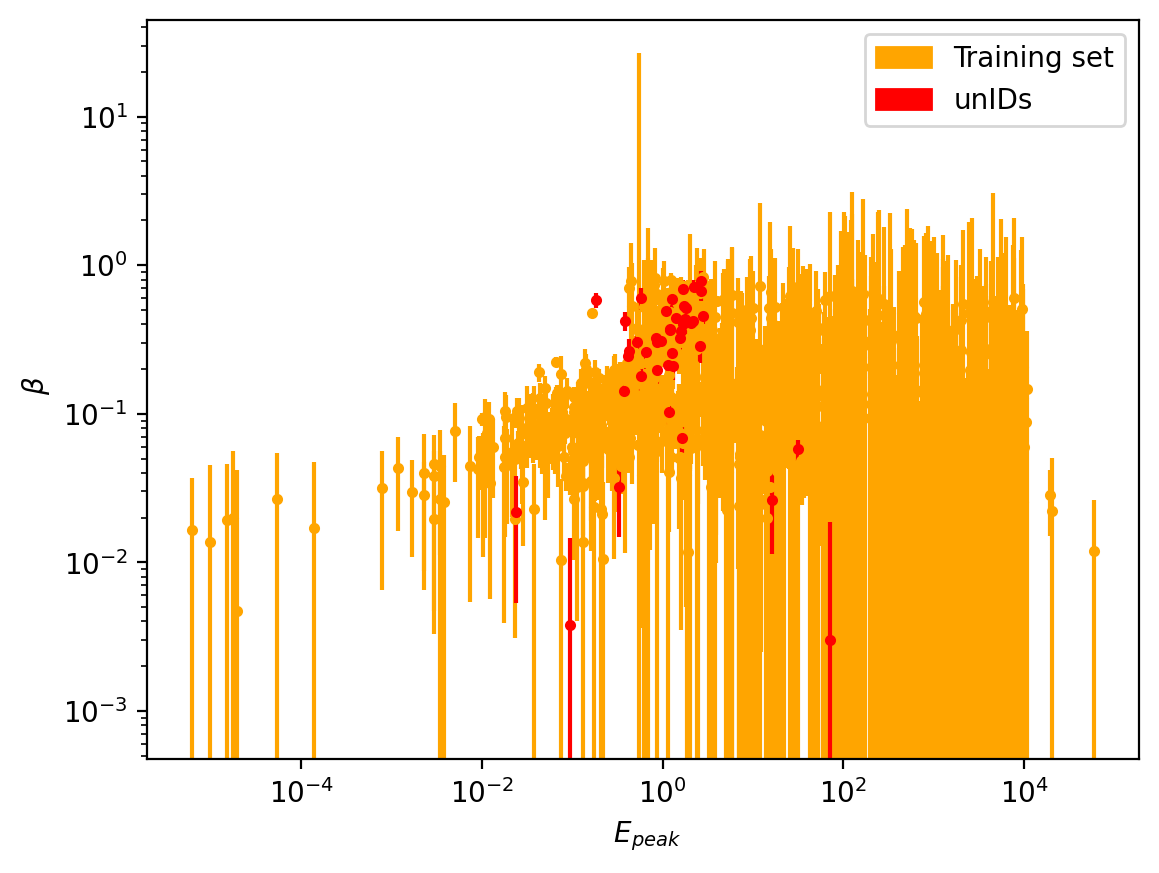

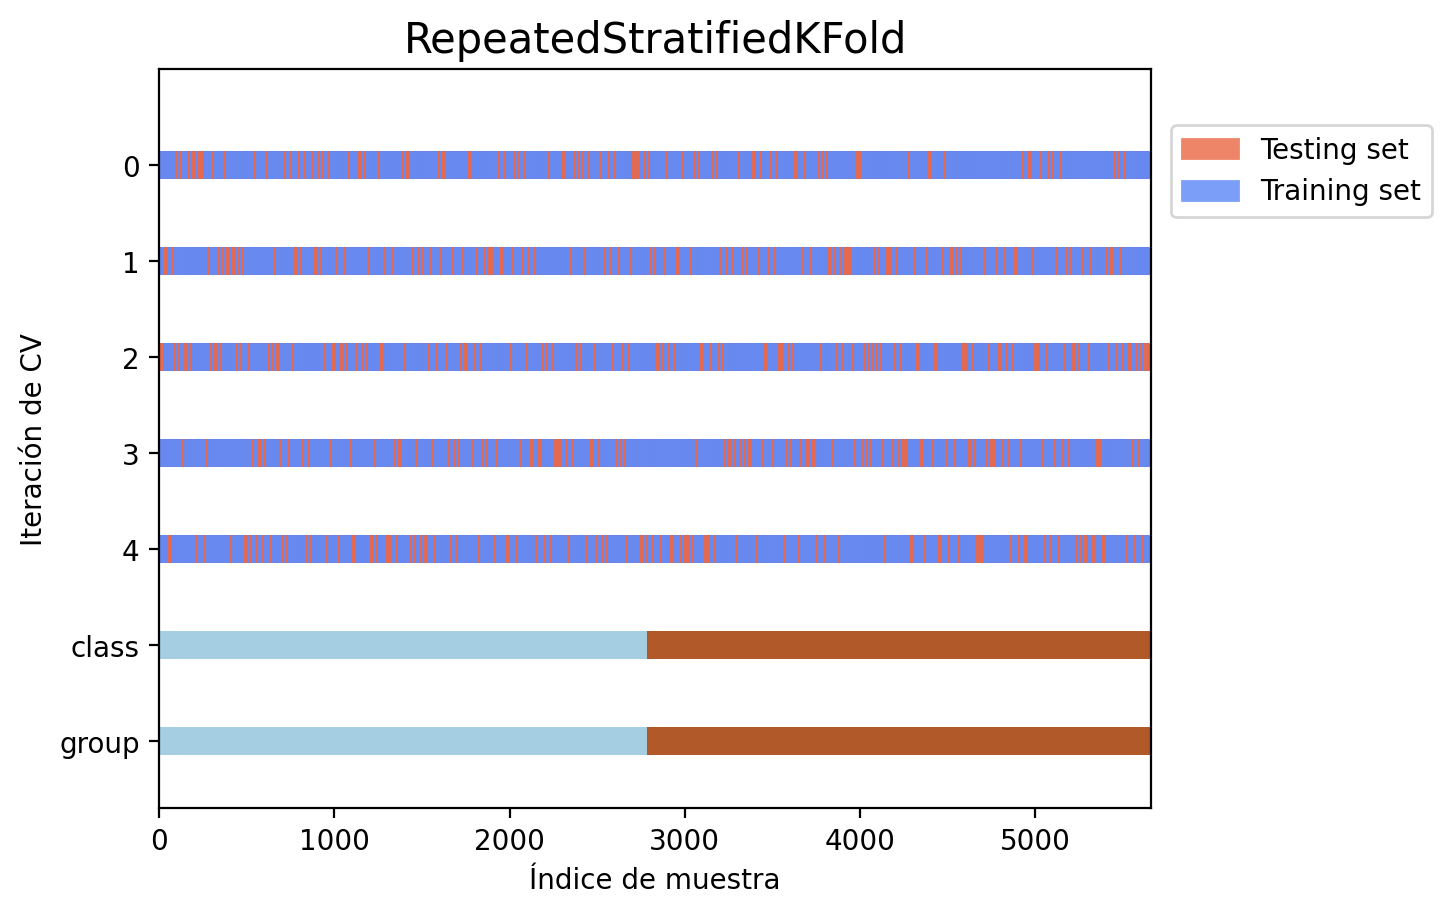

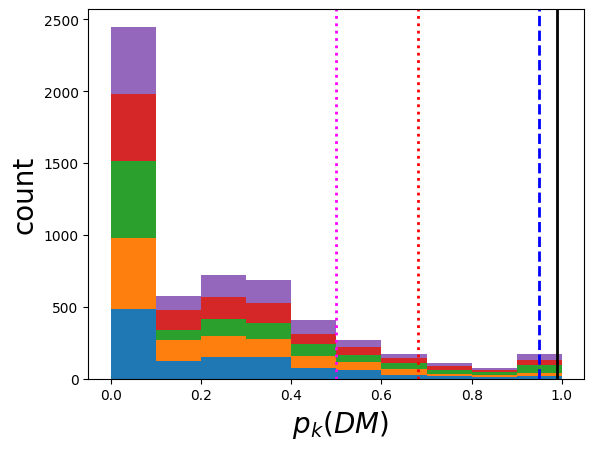

In [ ]:
import matplotlib.pyplot as plt

# Definir los límites de los bins para el histograma
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Crear una figura y un eje para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1)

# Graficar el histograma de las probabilidades de ser DM para cada unID
# Se utiliza el arreglo unids_DM_std_proba_N_sample_repeated_kfold y se seleccionan todas las columnas excepto la primera
# Se especifican los bins definidos anteriormente, el tipo de histograma como 'bar', y se apilan las barras
counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample+1)], 
                                         bins, histtype='bar', stacked=True, density=False, label='all p hist')

# Añadir líneas verticales en posiciones específicas para resaltar ciertos valores de probabilidad
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
plt.axvline(0.68, color='red', linestyle=':', linewidth=2)
plt.axvline(0.95, color='blue', linestyle='--', linewidth=2)
plt.axvline(0.99, color='black', linestyle='-', linewidth=2)

# Configurar las etiquetas de los ejes x e y
plt.xlabel(r' $p_k(DM)$', size=20)
plt.ylabel('count', size=20)

# Guardar la figura en un archivo (comentado)
# fig.savefig("full_histo_4F.pdf", bbox_inches='tight')


In [ ]:
# Convertir las probabilidades de ser DM a un arreglo de cadenas de texto
all_color = np.asarray(unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample+1)], dtype='str')

# Imprimir la forma del arreglo all_color
print(all_color.shape)

# Recorrer cada fila del arreglo all_color
for i in range(0, len(unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample+1)])):
    # Recorrer cada muestra en la fila actual
    for j in range(0, N_sample):
        # Asignar el color 'midnightblue' a cada muestra
        all_color[i, j] = 'midnightblue'

# Imprimir la cantidad de unIDs
print(len(unids_log))

# Imprimir la forma del arreglo all_color
print(all_color.shape)

# Imprimir el contenido del arreglo all_color
print(all_color)

(1125, 5)
1125
(1125, 5)
[['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ...
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']]


Text(0.31622776601683794, 1, ' $NN, 4F$')

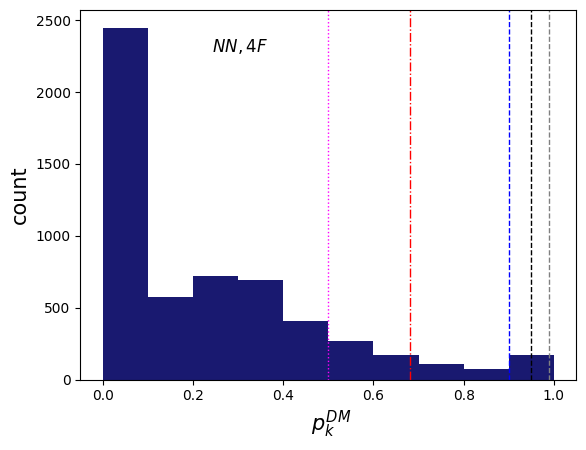

In [ ]:
import matplotlib.pyplot as plt

# Definir los límites de los bins para el histograma
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Crear una figura y un eje para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1)

# Graficar el histograma de las probabilidades de ser DM para cada unID
# Se utiliza el arreglo unids_DM_std_proba_N_sample_repeated_kfold y se seleccionan todas las columnas excepto la primera
# Se especifican los bins definidos anteriormente, el tipo de histograma como 'barstacked', y se colorean las barras
counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample+1)], 
                                         bins, histtype='barstacked', density=False, color=all_color[i, :])

# Añadir líneas verticales en posiciones específicas para resaltar ciertos valores de probabilidad
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=1)
plt.axvline(0.68, color='red', linestyle='-.', linewidth=1)
plt.axvline(0.90, color='blue', linestyle='--', linewidth=1)
plt.axvline(0.95, color='black', linestyle='--', linewidth=1)
plt.axvline(0.99, color='gray', linestyle='--', linewidth=1)

# Configurar las etiquetas de los ejes x e y
plt.xlabel(r' $p_k^{DM}$', size=15)
plt.ylabel('count', size=15)

# Configurar el título del gráfico
plt.title(r' $NN, 4F$', y=10**(0), x=10**(-0.5), pad=-30)

# Guardar la figura en un archivo (comentado)
# fig.savefig("full_histo_4F_single_count.pdf", bbox_inches='tight')


## Obtener las fuentes clasificadas como DM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold

# Definir umbral para clasificar como DM (ajustado para reducir falsos positivos)
umbral_DM = 0.99  # Aumentado a 0.99 para mayor precisión

# Conjunto para almacenar fuentes DM sin duplicados
fuentes_DM = set()
probabilidades_filtradas = []

# Realizar validación cruzada estratificada repetida
N_splits = 5  # Número de divisiones para validación cruzada
N_Repeats = 1  # Número de repeticiones
rskf = RepeatedStratifiedKFold(n_splits=N_splits, n_repeats=N_Repeats)

for train_index, test_index in rskf.split(X_log, Y):
    X_train, X_test = X_log[train_index], X_log[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Entrenar modelo de red neuronal usando el pipeline
    pipe.fit(X_train, Y_train)
    
    # Obtener probabilidades de clasificación como DM
    probabilidades_DM = pipe.predict_proba(X_test)[:, 1]  # Probabilidad de ser DM
    
    # Filtrar fuentes con alta probabilidad de ser DM
    indices_filtrados = probabilidades_DM >= umbral_DM
    fuentes_identificadas = X_test[indices_filtrados]
    
    # Agregar fuentes a un conjunto para evitar duplicados
    for i, fuente in enumerate(fuentes_identificadas):
        fuentes_DM.add(tuple(fuente))
        probabilidades_filtradas.append(probabilidades_DM[indices_filtrados][i])

# Convertir a DataFrame para exportar
columnas = ['Beta', 'Beta_err', 'E_peak', 'Sigma']  # Ajustar nombres según las características usadas
fuentes_DM = list(fuentes_DM)  # Convertir conjunto a lista para DataFrame
if fuentes_DM:
    df_fuentes_DM = pd.DataFrame(fuentes_DM, columns=columnas)
    df_fuentes_DM['Probabilidad_DM'] = probabilidades_filtradas[:len(fuentes_DM)]
    
    # Guardar en un archivo CSV
    ruta_salida = "fuentes_identificadas_como_DM.csv"
    df_fuentes_DM.to_csv(ruta_salida, index=False)
    print(f"Se han guardado {len(df_fuentes_DM)} fuentes clasificadas como DM en {ruta_salida}")
else:
    print("No se han identificado fuentes con probabilidad superior al umbral.")

# Mostrar un resumen de las probabilidades generadas
print("Distribución de probabilidades para DM:")
print(df_fuentes_DM['Probabilidad_DM'].describe())


Se han guardado 2011 fuentes clasificadas como DM en fuentes_identificadas_como_DM.csv
Distribución de probabilidades para DM:
count    2011.000000
mean        0.999406
std         0.001623
min         0.990180
25%         0.999869
50%         0.999999
75%         1.000000
max         1.000000
Name: Probabilidad_DM, dtype: float64
